# Fundamentos de procesamiento digital de imágenes con scikit-image

Este es un taller introductorio en dónde se expondrán algunos de los algoritmos y conceptos escenciales en el procesamiento digital de imágenes.

## Práctica #1 
Cargar una imágen de la base de datos de ejemplo y visualizarla.

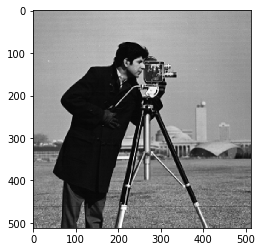

In [2]:
import matplotlib.pyplot as plt
from skimage import data

Img = data.camera()
plt.imshow(Img,cmap='gray')
plt.show()

## Práctica #2
Extraer y visualizar de manera separada los canales de una imagen RGB.

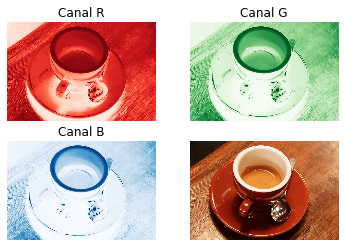

In [7]:
I_RGB = data.coffee()

I_R =  I_RGB[:,:,0]
I_G =  I_RGB[:,:,1]
I_B =  I_RGB[:,:,2]

plt.subplot(221), plt.imshow(I_R,cmap='Reds'), plt.title('Canal R'),plt.axis('off')
plt.subplot(222), plt.imshow(I_G,cmap='Greens'), plt.title('Canal G'),plt.axis('off')
plt.subplot(223), plt.imshow(I_B,cmap='Blues'), plt.title('Canal B'),plt.axis('off')
plt.subplot(224), plt.imshow(I_RGB),plt.axis('off')
plt.show()

## Nota: Síntesis de imágenes RGB
Es posible sinstetisar imágenes RGB haciendo *stacking* de arreglos 2-D de numpy:  

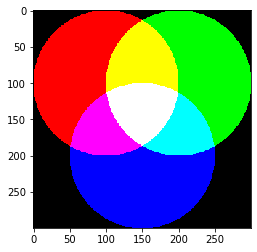

In [24]:
from skimage import draw

R = np.zeros([300,300])
G = np.zeros([300,300])
B = np.zeros([300,300])

Cx,Cy = draw.circle(100,100,100)
R[Cx,Cy] = 1

Cx,Cy = draw.circle(100,200,100)
G[Cx,Cy] = 1

Cx,Cy = draw.circle(200,150,100)
B[Cx,Cy] = 1

RGB = np.stack([R,G,B],axis=2)

plt.imshow(RGB)
plt.show()

## Práctica #3
Realizar un filtrado de promedio móvil a *Camera man*.

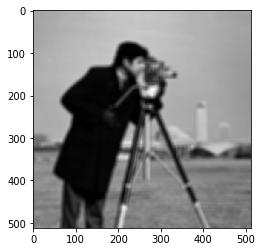

In [9]:
import numpy as np
from scipy import ndimage
from skimage.util import img_as_float

Imf = img_as_float(Img)     #Convierte de uint8 a float
H = np.ones([11,11])*1/11.0 #Kernel de convolución
Ip = ndimage.convolve(Imf,H)

plt.imshow(Ip,cmap='gray')
plt.show()


## Nota: Kernel gaussiano

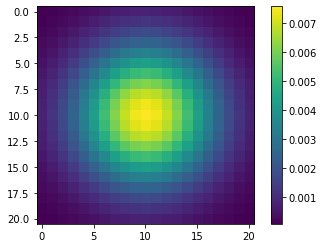

In [13]:
import scipy.stats as st

def gkern(kernlen=21, nsig=5):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

Kg = gkern(21,3)
plt.imshow(Kg)
plt.colorbar()
plt.show()

## Practica #4
Realizar un filtrado gaussiano con $\sigma = 10$ a *Camera Man*

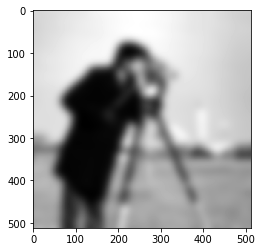

In [11]:
from skimage import filters

Im = data.camera()
Ig = filters.gaussian(Im,sigma=10)

plt.imshow(Ig,cmap='gray')
plt.show()

## Nota: Promedio móvil vs filtrado gaussiano 
El filtro de promedio movil tiene el inconvenirte de producir artefactos (estructuras repetidas o *fantasmas*) cuando su kernel es muy grande. El filtro gaussiano no podruce esos artefactos como se demuestra en este código:

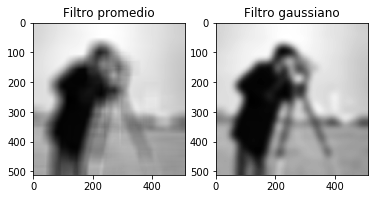

In [14]:
Imf = img_as_float(Img)      #Convierte de uint8 a float
H = np.ones([51,51])*1/51.0  #Kernel de promedio móvil
Ip = ndimage.convolve(Imf,H)

kernel = gkern(51,nsig=3) #Kernel gausiano 51x51 y sigma = 3

Im = data.camera()
Ig = ndimage.convolve(Im,kernel)

plt.subplot(121),plt.imshow(Ip,cmap='gray'), plt.title('Filtro promedio')
plt.subplot(122),plt.imshow(Ig,cmap='gray'), plt.title('Filtro gaussiano')
plt.show()

## Nota: Histogramas y contraste

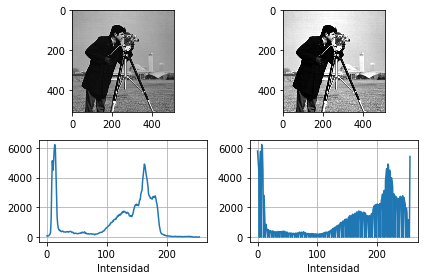

In [20]:
from skimage import exposure, color

img = data.camera()
h, h_bins = exposure.histogram(img)

p2,p98 = np.percentile(img,(2, 98))
img_c = exposure.rescale_intensity(img,(p2,p98))
hc, hc_bins = exposure.histogram(img_c)

plt.subplot(221), plt.imshow(img,cmap='gray')
plt.subplot(222), plt.imshow(img_c,cmap='gray')
plt.subplot(223), plt.plot(h_bins,h), plt.grid('True'), plt.xlabel('Intensidad')
plt.subplot(224), plt.plot(hc_bins,hc), plt.grid('True'), plt.xlabel('Intensidad')

fig = plt.gcf()
fig.tight_layout()

plt.show()


## Práctica #5
Calcular el valor de umbral con el método de Otsu y obtener una imagen binarizada de Chelsea The Cat. Graficar histograma.

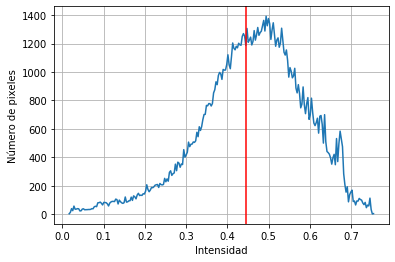

In [21]:
from skimage import exposure, color

Im = data.chelsea()
Im = color.rgb2gray(Im)  #Conversión a escala de grises

#Umbral
Umbral = filters.threshold_otsu(Im) #Cálculo del umbral con el método de Otsu

#Histograma
Hist, centros = exposure.histogram(Im) 

plt.plot(centros,Hist), plt.xlabel('Intensidad'), plt.ylabel(u'Número de pixeles')
plt.axvline(Umbral,color ='r') #Linea de umbral
plt.grid()
plt.show()


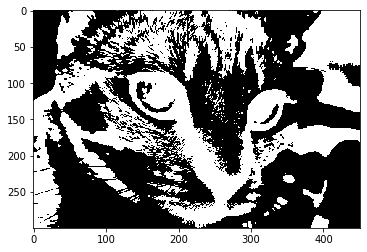

In [23]:
#Binarización
B = Im < Umbral

plt.imshow(B,cmap='gray')

## Nota: Etiqueado y propiedades de objetos binarios (*blobs*)

Es posible etiquetar de forma automatica regiones continuas en una imagen binaria y posteriormente calcular varios de sus atrobutos como área, perímetro y centróide. 

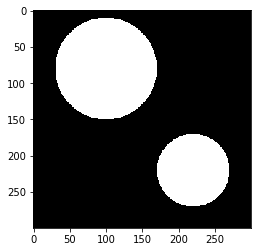

Región 1:
Area (pixeles): 15361
Perimetro (pixeles): 458.2741699796952
Centroide: (80.0, 100.0)


Región 2:
Area (pixeles): 7825
Perimetro (pixeles): 326.3919189857866
Centroide: (220.0, 220.0)


In [34]:
from skimage import draw, measure

# Generación de una imagen binaria con dos objetos separados
Bim = np.zeros([300,300])

C1x,C1y = draw.circle(80,100,70)
Bim[C1x,C1y] = 1

C2x,C2y = draw.circle(220,220,50)
Bim[C2x,C2y] = 1

#Etiquetado
E = measure.label(Bim)

#Propiedades de regiones
PR = measure.regionprops(E)

#PR[i].area => área del objeto i
#PR[i].perimeter => Perímetro del objeto i
#PR[i].centroid => centroide del objeto i

plt.imshow(Bim,cmap='gray')
plt.show()

print(u"Región 1:")
print("Area (pixeles): " + str(PR[0].area))
print("Perimetro (pixeles): " + str(PR[0].perimeter))
print("Centroide: " + str(PR[0].centroid))
print('\n')
print(u"Región 2:")
print("Area (pixeles): " + str(PR[1].area))
print("Perimetro (pixeles): " + str(PR[1].perimeter))
print("Centroide: " + str(PR[1].centroid))

## Práctica #6
Aplicaar el operado de Sobel a coins.

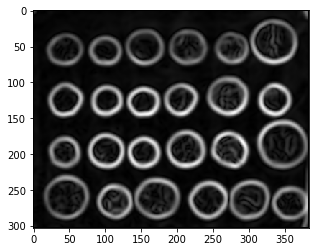

In [27]:
Im = data.coins()
Im = filters.gaussian(Im,sigma=3)
Ibordes = filters.sobel(Im)

plt.imshow(Ibordes,cmap='gray')
plt.show()

## Práctica #7
Obtener el campo de gradiente de Coffee

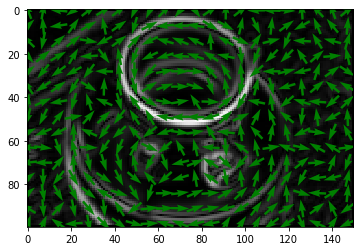

In [76]:
from skimage import transform

Im = data.coffee()
Im = color.rgb2gray(Im)
Im = filters.gaussian(Im,sigma=4)
Ims = transform.rescale(Im,0.25)

I_Sob = filters.sobel(Ims)
I_Sob_X = filters.sobel_h(Ims)
I_Sob_Y = filters.sobel_v(Ims)

plt.imshow(I_Sob,cmap='gray')

m,n = Ims.shape
for i in range(0,m,7):
    for j in range(0,n,7):
        plt.quiver(j,i,I_Sob_X[i][j], I_Sob_Y[i][j], pivot='middle',color='g')
plt.show()

## Práctica final
Realizar una segmantación por umbral de una imágen.

[]

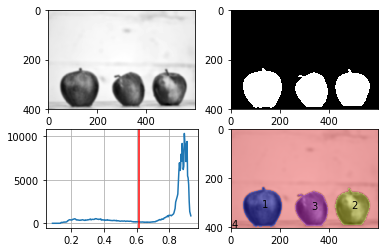

In [79]:
from skimage import io, measure
from scipy import ndimage 

I = io.imread("manzanas.jpg")
I = color.rgb2grey(I)
I = filters.gaussian(I,sigma=3)

hist, centros_hist = exposure.histogram(I)

Umb = filters.threshold_otsu(I)
B = I < T

B = ndimage.binary_fill_holes(B).astype(int) # Rellenar agujeros en la imágen binaria

# Etiquetado de elementos binarios 
label_image = measure.label(B)
image_label_overlay = color.label2rgb(label_image, image=I)

Regiones = measure.regionprops(label_image)

plt.subplot(221),plt.imshow(I,cmap='gray')
plt.subplot(222),plt.imshow(B,cmap='gray')
plt.subplot(223),plt.plot(centros_hist,hist), plt.grid(True), plt.axvline(Umb,color='r') 
plt.subplot(224),plt.imshow(image_label_overlay)

for r in Regiones:
    plt.text(r.centroid[1],r.centroid[0],str(r.label))

plt.plot()